In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)

In [3]:
x,y=make_circles(n_samples=500, factor=0.1,noise=0.35,random_state=42)

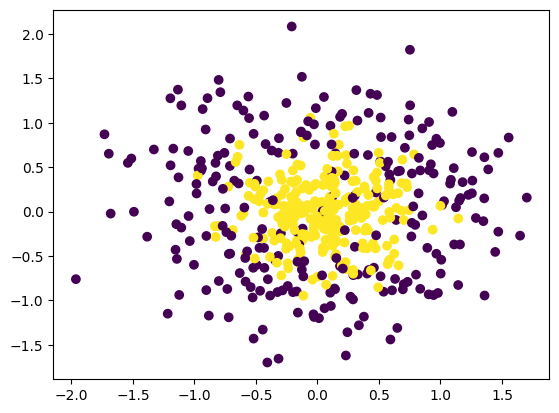

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,x,y,scoring='accuracy',cv=10))

0.812

In [6]:
abc.fit(x,y)

AdaBoostClassifier()

In [7]:
def plot_decision_boundary(clf):
  plt.figure(figsize=(12,8))
  x_range = np.linspace(x.min(),x.max(),100)
  xx1,xx2 = np.meshgrid(x_range,x_range)
  y_hat=clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
  y_hat= y_hat.reshape(xx1.shape)
  plt.contourf(xx1,xx2,y_hat,alpha=0.2)
  plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=.7)
  plt.title("adaboost classifier")
  plt.show()

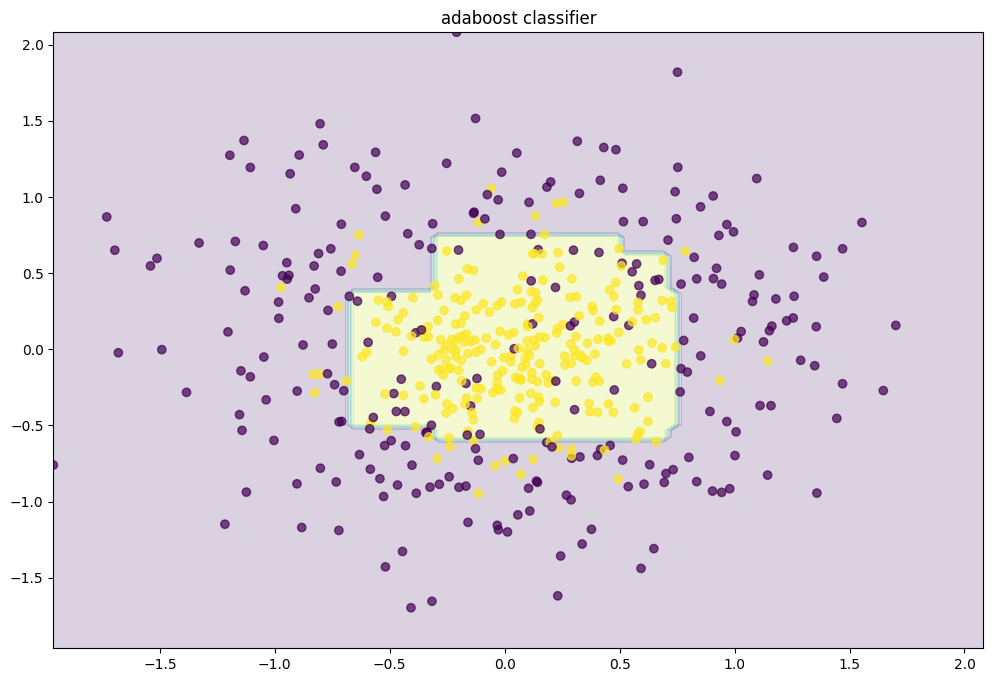

In [8]:
plot_decision_boundary(abc)

OVERFITTING

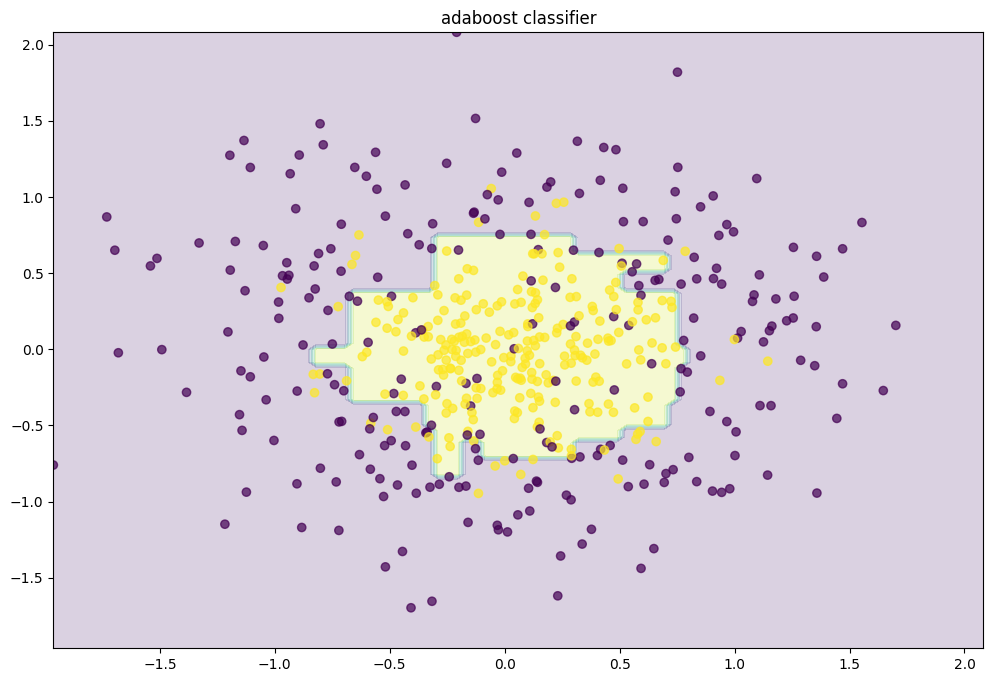

In [9]:
abc = AdaBoostClassifier(n_estimators=1000,learning_rate=1)
abc.fit(x,y)
plot_decision_boundary(abc)


UNDERFITTING

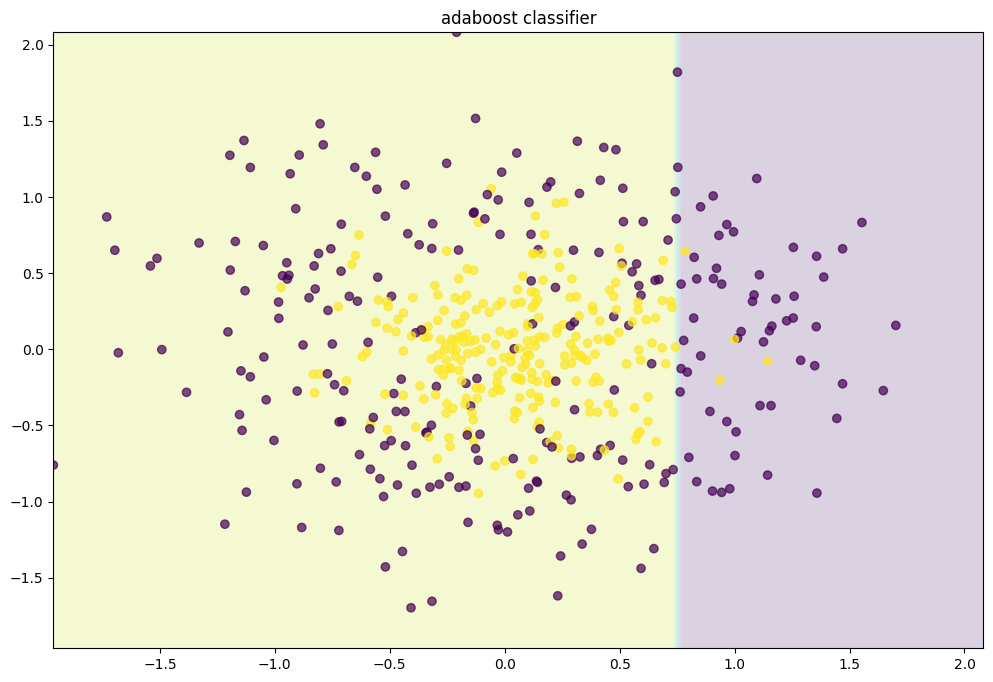

In [10]:
abc = AdaBoostClassifier(n_estimators=1)
abc.fit(x,y)
plot_decision_boundary(abc)
